In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [29]:
# loading the data from csv file to a pandas Dataframe
raw_mail_data = pd.read_csv('/content/data/combined_data.csv')

In [30]:
print(raw_mail_data)

       label                                               text
0          1  ounce feather bowl hummingbird opec moment ala...
1          1  wulvob get your medircations online qnb ikud v...
2          0   computer connection from cnn com wednesday es...
3          1  university degree obtain a prosperous future m...
4          0  thanks for all your answers guys i know i shou...
...      ...                                                ...
83443      0  hi given a date how do i get the last date of ...
83444      1  now you can order software on cd or download i...
83445      1  dear valued member canadianpharmacy provides a...
83446      0  subscribe change profile contact us long term ...
83447      1  get the most out of life ! viagra has helped m...

[83448 rows x 2 columns]


In [31]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [32]:
# printing the first 5 rows of the dataframe
mail_data.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [33]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(83448, 2)

In [34]:
# label spam mail as 1;  ham mail as 0;
mail_data.loc[mail_data['label'] == 'spam', 'label',] = 1
mail_data.loc[mail_data['label'] == 'ham', 'label',] = 0


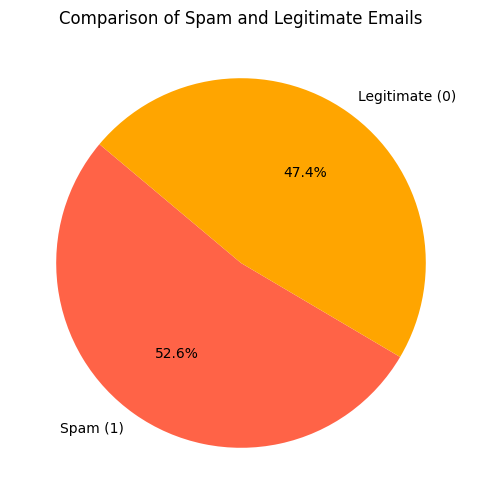

In [35]:
import matplotlib.pyplot as plt


# Count the number of spam and legitimate emails
email_counts = mail_data['label'].value_counts()

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(email_counts, labels=['Spam (1)', 'Legitimate (0)'], autopct='%1.1f%%', startangle=140, colors=['tomato', 'orange'])
plt.title('Comparison of Spam and Legitimate Emails')
plt.show()

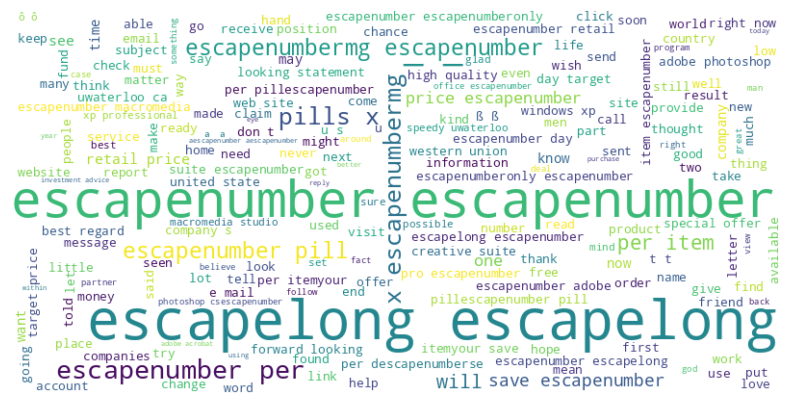

In [67]:
from wordcloud import WordCloud

# Extract spam emails from the DataFrame
spam_emails = mail_data[mail_data['label'] == 1]['text']

# Generate a word cloud image for spam words
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(spam_emails))

# Display the image
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [37]:
# separating the data as texts and label

X = mail_data['text']

Y = mail_data['label']

In [38]:
print(X)

0        ounce feather bowl hummingbird opec moment ala...
1        wulvob get your medircations online qnb ikud v...
2         computer connection from cnn com wednesday es...
3        university degree obtain a prosperous future m...
4        thanks for all your answers guys i know i shou...
                               ...                        
83443    hi given a date how do i get the last date of ...
83444    now you can order software on cd or download i...
83445    dear valued member canadianpharmacy provides a...
83446    subscribe change profile contact us long term ...
83447    get the most out of life ! viagra has helped m...
Name: text, Length: 83448, dtype: object


In [39]:
print(Y)

0        1
1        1
2        0
3        1
4        0
        ..
83443    0
83444    1
83445    1
83446    0
83447    1
Name: label, Length: 83448, dtype: int64


In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [41]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(83448,)
(66758,)
(16690,)


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer with the correct lowercase parameter
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


In [43]:
# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [44]:
print(X_train)

44881    dear sir ,\n* öðâ · í ¨ åäüþ ³ § óð ¶ àäêéú ² ...
75877    welcome to inet r - x ,\nvi - ag - ra ( 30 pil...
23711    i didn ' t see this before it went out , but i...
75840    she owned that considering every thing she was...
22581    my girlfriend loves the results , but she does...
                               ...                        
48056    - - - - - original message - - - - -\nfrom : c...
59011    bob and wayne ,\nit appears that our commercia...
77049    adult contents ahead http www asyouwin com gen...
67224    canadian generic pharmacy ! private , secure ,...
71530    ci - ialis softabs is better than pfizer viiag...
Name: text, Length: 66758, dtype: object


In [45]:
print(X_train_features)

  (0, 2190)	0.01765632496415215
  (0, 140385)	0.022672662799897995
  (0, 50989)	0.009085912125678743
  (0, 140384)	0.021296006429698058
  (0, 250670)	0.00500604690998063
  (0, 111365)	0.003677326923941654
  (0, 66478)	0.009406342128801036
  (0, 184185)	0.010906526096267135
  (0, 200310)	0.00935340927858773
  (0, 111390)	0.01895508525957814
  (0, 8391)	0.018542693689298183
  (0, 8287)	0.01782192878729796
  (0, 6921)	0.01710492187188402
  (0, 6752)	0.01383748525227664
  (0, 6321)	0.019286870595029818
  (0, 6260)	0.01867087334397924
  (0, 6115)	0.0153711792467762
  (0, 5702)	0.018002607410089383
  (0, 5598)	0.019114057706552258
  (0, 5417)	0.01765632496415215
  (0, 281)	0.018807899763035246
  (0, 5206)	0.19909460259397685
  (0, 5328)	0.013005275416205376
  (0, 367)	0.01867087334397924
  (0, 5189)	0.03582042844965976
  :	:
  (66757, 47658)	0.26381435414837523
  (66757, 132973)	0.1389368733660041
  (66757, 45212)	0.11329837959140375
  (66757, 57855)	0.10646043514466909
  (66757, 203202)	0.1

In [46]:
model = LogisticRegression()

In [47]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

In [48]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [49]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9898289343599269


In [50]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [51]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.984661473936489


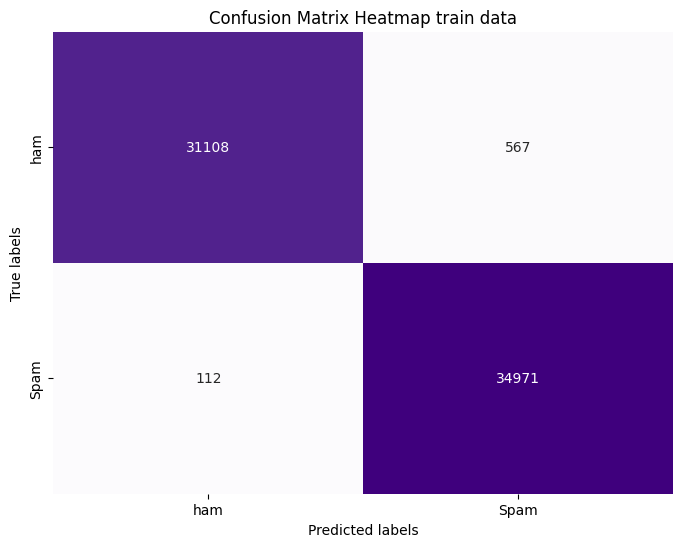

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Generate confusion matrix
cf_matrix = confusion_matrix(Y_train, prediction_on_training_data)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, cmap='Purples', fmt='g', cbar=False,
            xticklabels=['ham', 'Spam'],
            yticklabels=['ham', 'Spam'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap train data')
plt.show()




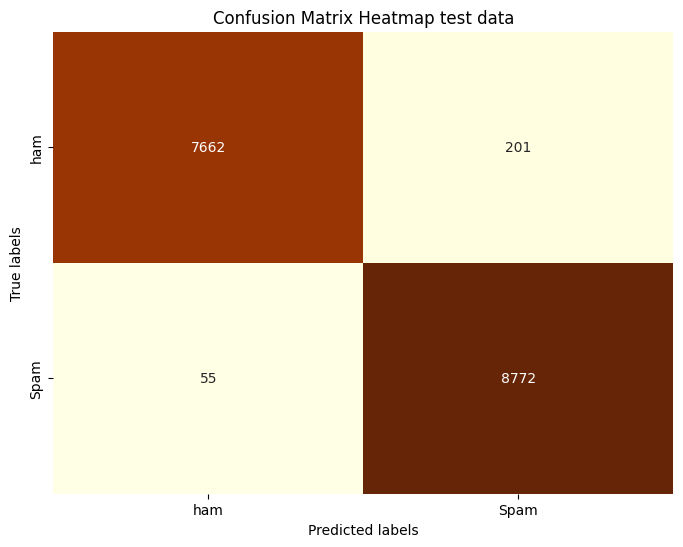

In [66]:
# Generate confusion matrix
cf_matrix = confusion_matrix(Y_test, prediction_on_test_data)

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cf_matrix, annot=True, cmap='YlOrBr', fmt='g', cbar=False,
            xticklabels=['ham', 'Spam'],
            yticklabels=['ham', 'Spam'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix Heatmap test data')
plt.show()

In [25]:
# Get user input
new_email = input("Enter your  email text:   ")

# Vectorize the new email using the trained TF-IDF model
new_email_features = feature_extraction.transform([new_email])

# Make a prediction
prediction = model.predict(new_email_features)

# Display the prediction
if prediction[0] == 1:
    print("Prediction: Spam")
else:
    print("Prediction: ham")


Enter your  email text:   computer connection from cnn com wednesday escapenumber may escapenumber escapenumber escapenumber escapenumber pm edt in this report next generation toys read brain waves google expands
Prediction: ham


In [26]:
# Get user input
new_email = input("Enter your  email text:   ")

# Vectorize the new email using the trained TF-IDF model
new_email_features = feature_extraction.transform([new_email])

# Make a prediction
prediction = model.predict(new_email_features)

# Display the prediction
if prediction[0] == 1:
    print("Prediction: Spam")
else:
    print("Prediction: ham")

Enter your  email text:   Congratulations! You’ve won a $500 Amazon gift card. Claim it here
Prediction: Spam


In [27]:
# Get user input
new_email = input("Enter your  email text:   ")

# Vectorize the new email using the trained TF-IDF model
new_email_features = feature_extraction.transform([new_email])

# Make a prediction
prediction = model.predict(new_email_features)

# Display the prediction
if prediction[0] == 1:
    print("Prediction: Spam")
else:
    print("Prediction: ham")

Enter your  email text:   I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.
Prediction: Spam
